Hi Daniel. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1<a class="tocSkip">

Unfortunately, due to temporary problems on the server, the previous review was not saved.
    
You've worked really hard and submitted a solid project. While there's room for improvement, on the whole, your project is looking good. There are few things that need to be corrected in your project. They're mostly minor issues that are easy to fix. "Improve" comments mean that there are tiny corrections which could help you to make your project better. One more time and you'll have it!

<div class="alert alert-info"> <b>Student comment:</b> <br />
I very much appreciate all of your input and time invested into the detailed comments, Svetlana. Thank you! <br />
I have added conclusions to each section, and have answered all of the red comment blocks. <br />
Hope it's better now 🤠

## Review v. 2<a class="tocSkip">

All your hard work has paid off, and now your project is perfect! I'm glad to say that your project has been accepted. Keep up the good work, and good luck on the next sprint!

In [1]:
!pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.8 MB 15.6 MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os.path, io
from functools import reduce
from IPython.display import display, display_html
from IPython.display import Markdown as md

The aim of this project is to analyse and compare Megaline's (a Telecom operator) user plans:  
 \- Surf and Ultimate.  
Check client's usage, and determine which plan brings in more revenue.

<a class="anchor" id="0_toc"></a>
# Table of Contents
***

1. [Datasets](#1_data_files)
2. [Preprocess](#2_preprocess)
    1. [Plans](#2_1-plans)
    2. [Users](#2_2-users)
    3. [Calls](#2_3-calls)
    4. [Messages](#2_4-messages)
    5. [Internet](#2_5-internet)
    <br />[Conclusions](#2_preprocess-conclusions)
3. [Data Structure](#3_data_structure)
    1. [Monthly calls usage](#3_1-monthly_calls)
    2. [Monthly messages usage](#3_2-monthly_messages)
    3. [Monthly internet usage](#3_3-monthly_internet)
    4. [Monthly revenue by user](#3_4-monthly_revenue)
    5. [Average revenue per user](#3_5-avg_user_revenue)
    6. [Total usage by plan](#3_6-total_usage)
    7. [Excess usage by plan](#3_7-excess_usage)
    <br />[Conclusions](#3_data_structure-conclusions)
4. [Analysis](#4_analysis)
    1. [Outliers](#4_1-outliers)
    2. [Descriptive statistics](#4_2-stats)
    3. [Plots](#4_3-plots)
    <br />[Conclusions](#4_analysis-conclusions)
5. [Hypotheses testing](#5_hypotheses)
    1. [Surf / Ultimate Plans hypothesis](#5_1-plans_hypothesis)
    2. [NY-NJ hypothesis](#5_2-ny_nj_hypothesis)
    <br />[Conclusions](#5_hypotheses-conclusions)
6. [Conclusions](#6_conclusions)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you formulated a goal of the project.
</div>

<a class="anchor" id="1_data_files"></a>
## Parse Datasets
***
[back to Table of Contents](#0_toc)

In [3]:
dataset_files = [
    'megaline_calls.csv',
    'megaline_internet.csv',
    'megaline_messages.csv',
    'megaline_plans.csv',
    'megaline_users.csv'
]

In [4]:
def print_file_metadata(filepath):
    """Prints metadata related to files"""
    
    try:
        !du -m "$filepath"      # filesize in MiB
        !stat -c %y "$filepath" # date, filename
        !file "$filepath"       # file type, encoding
        !wc -l "$filepath"      # line count
        !head -n3 "$filepath"   # file preview
    except Exception as e:
        print(e)

In [5]:
def load_files(files):
    """Returns parsed DataFrames"""
    
    def load_file(file):
        display(md(f'\n***\n#### Loading {file}..\n\n'))
        
        filepath = f'/datasets/{file}'
        if not os.path.isfile(filepath):
            filepath = file
            
        print_file_metadata(filepath)
        
        return pd.read_csv(filepath)
    
    return [load_file(file) for file in files]

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done for writing a separate functions
</div>

In [6]:
calls_df, internet_df, messages_df, plans_df, users_df = load_files(dataset_files)


***
#### Loading megaline_calls.csv..



4	/datasets/megaline_calls.csv
2020-03-06 14:20:36.045115188 +0000
/bin/bash: file: command not found
137736 /datasets/megaline_calls.csv
id,user_id,call_date,duration
1000_93,1000,2018-12-27,8.52
1000_145,1000,2018-12-27,13.66



***
#### Loading megaline_internet.csv..



4	/datasets/megaline_internet.csv
2020-03-06 14:20:35.704904803 +0000
/bin/bash: file: command not found
104826 /datasets/megaline_internet.csv
id,user_id,session_date,mb_used
1000_13,1000,2018-12-29,89.86
1000_204,1000,2018-12-31,0.0



***
#### Loading megaline_messages.csv..



2	/datasets/megaline_messages.csv
2020-03-06 14:20:35.216904498 +0000
/bin/bash: file: command not found
76052 /datasets/megaline_messages.csv
id,user_id,message_date
1000_125,1000,2018-12-27
1000_160,1000,2018-12-31



***
#### Loading megaline_plans.csv..



1	/datasets/megaline_plans.csv
2020-04-28 10:29:13.372396972 +0000
/bin/bash: file: command not found
2 /datasets/megaline_plans.csv
messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
50,15360,500,20,10,0.03,0.03,surf
1000,30720,3000,70,7,0.01,0.01,ultimate


***
#### Loading megaline_users.csv..



1	/datasets/megaline_users.csv
2020-08-06 11:48:28.903935292 +0000
/bin/bash: file: command not found
500 /datasets/megaline_users.csv
user_id,first_name,last_name,age,city,reg_date,plan,churn_date
1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,
1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,


All of the .csv files have been successfully loaded into memory.

<a class="anchor" id="2_preprocess"></a>
## Preprocess
***
[back to Table of Contents](#0_toc)
1. [Plans](#2_1-plans)
2. [Users](#2_2-users)
3. [Calls](#2_3-calls)
4. [Messages](#2_4-messages)
5. [Internet](#2_5-internet)
<br />[Conclusions](#2_preprocess-conclusions)

In [7]:
def dataset_info(df, head=2, info=True, describe=True, na=True, nunique=True):
    """Displays a detailed overview of a dataframe"""
    
    output = []
    
    if head:
        output.append(df.head(head))
        
    if describe:
        output.append(df.describe())
              
    display(*output)
    output.clear()
    
    df.info()
    print()
        
    if na:
        print(f'missing values:\n\n{df.isna().sum()}\n')
        
    if nunique:
        print(f'unique values:\n\n{df.nunique()}\n')

<a class="anchor" id="2_1-plans"></a>
### Plans
[back to Preprocess](#2_preprocess)

Carrier policy is to round up call usage to minutes,  
and to round up total monthly internet usage to gigabytes.

- __Surf__  
    Monthly charge: \$20  
    500 monthly minutes, 50 texts, and 15 GB of data  
    After exceeding the package limits:  
        1 minute: 3 cents  
        1 text message: 3 cents  
        1 GB of data: $10  
       
- __Ultimate__  
    Monthly charge: \$70  
    3000 monthly minutes, 1000 text messages, and 30 GB of data  
    After exceeding the package limits:  
        1 minute: 1 cent  
        1 text message: 1 cent  
        1 GB of data: $7

    plan_name — calling plan name
    usd_monthly_fee — monthly charge in US dollars
    minutes_included — monthly minute allowance
    messages_included — monthly text allowance
    mb_per_month_included — data volume allowance (in megabytes)
    usd_per_minute — price per minute after exceeding the package limits
        (e.g., if the package includes 100 minutes, the 101st minute will be charged)
    usd_per_message — price per text after exceeding the package limits
    usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok :)
</div>

In [8]:
dataset_info(plans_df, describe=False, na=False, nunique=False)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



Converting mb_per_month_included to gb_per_month_included,  
since user is billed per GB.

In [9]:
plans_df['gb_per_month_included'] = (plans_df['mb_per_month_included'] / 1024).astype('int')
plans_df.drop('mb_per_month_included', axis=1, inplace=True)

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
It will be better to take into account that 1 Gb = 1024 Mb.
</div>

<div class="alert alert-info"> <b>Student comment:</b> <br />
I agree with you that it should be 1024, and I have changed it now. <br />

The project description on the platform says that: <br />
"Megaline rounds seconds up to minutes, and megabytes to gigabytes" <br />
Technically a megabyte (MB) is base 10, and a mebibyte (MiB) is base 2, <br />
but the bottom line is that network traffic is measured with MiB, so 1024 as you suggested :)
    
\- https://blog.digilentinc.com/mib-vs-mb-whats-the-difference/
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>

In [10]:
plans_df

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15
1,1000,3000,70,7,0.01,0.01,ultimate,30


<a class="anchor" id="2_2-users"></a>
### Users
[back to Preprocess](#2_preprocess)

    user_id — unique user identifier
    first_name — user's name
    last_name — user's last name
    age — user's age (years)
    reg_date — subscription date (dd, mm, yy)
    churn_date — the date the user stopped using the service
        (if the value is missing, the calling plan was being used when this data was retrieved)
    city — user's city of residence
    plan — calling plan name

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job that you clearly described the data fields.
</div>

In [11]:
dataset_info(users_df)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

missing values:

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

unique values:

user_id       500
first_name    458
last_name     399
age            58
city           73
reg_date      266
plan            2
churn_date     29
dtype: int64



churn_date missing values can be null, it is not an error (means plan was in use when snapshot of data was taken).  
reg_date and churn_date should be converted to datetime dtype,  
introduce plan_id instead of plan.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you are right :)
</div>

In [12]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])

In [13]:
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

surf        339
ultimate    161
Name: plan, dtype: int64

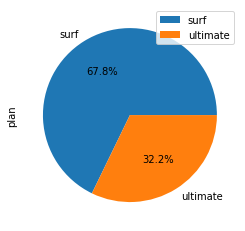

In [14]:
display(users_df['plan'].value_counts())
users_df['plan'].value_counts().plot.pie(autopct='%.1f%%', legend=True);

There are at least twice as much 'Surf' plan users as there are 'Ultimate' plan users.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, Surf is the most popular plan.
</div>

In [15]:
plan_ids = pd.Series(index=plans_df['plan_name'].values, data=plans_df['plan_name'].index)
users_df['plan_id'] = users_df['plan'].apply(lambda x:plan_ids[x])
users_df.drop('plan', axis=1, inplace=True)
del plan_ids

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's a good idea to use lambda function.
</div>

In [16]:
users_df.head(2)

,user_id,first_name,last_name,age,city,reg_date,churn_date,plan_id
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,0


<a class="anchor" id="2_3-calls"></a>
### Calls
[back to Preprocess](#2_preprocess)

In [17]:
dataset_info(calls_df)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

missing values:

id           0
user_id      0
call_date    0
duration     0
dtype: int64

unique values:

id           137735
user_id         481
call_date       351
duration       2802
dtype: int64



No missing values.  
Converting call_date dtype to datetime,  
Rounding up duration in order to sync to carrier's policy.

In [18]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

<div class="alert alert-info"> <b>Student comment</b> <br />
Explaining zero duration calls before rounding up and dropping:
</div>

In [19]:
empty_calls = calls_df.query('duration == 0')
print(f"There are {len(empty_calls)} ({len(empty_calls)/len(calls_df):.1%}) calls of 0 duration.")

less_than_1_minute_calls = len(calls_df.query('0 < duration < 1'))
print(f"There are {less_than_1_minute_calls} ({less_than_1_minute_calls/len(calls_df):.1%}) "
      "calls lasting between a second and a minute.")

There are 26834 (19.5%) calls of 0 duration.
There are 5725 (4.2%) calls lasting between a second and a minute.


zero duration calls take up a large portion of total calls logged (~20%), this warrants further investigation.  
It could be a result of a bug in the system, in which case the data engineering team should be notified.  
Another possible cause could be that the system is logging calls which were simply unanswered (i.e. not connected).  
In either case, for the purpose of this report - zero duration calls are not chargeable, and corresponding entries can be dropped.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, it's can be a technical errors or unanswered calls.
</div>

In [20]:
calls_df['duration'] = np.ceil(calls_df['duration']).astype('int')

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, it's correct that you have used .ceil to round up data.
</div>

In [21]:
## review v. 1 code - irrelevant
## There are calls with 0 duration,  
## they are not chargeable and should be removed to a separate dataframe, as to not interrupt further analysis.

In [22]:
## empty_calls = calls_df.query('duration == 0')
## print(f'amount of calls of 0 duration: {len(empty_calls)} ({(len(empty_calls) / len(calls_df)):.1%})')

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please explain a possible reasons of a zero duration calls?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You have made a reasonable explanation :)
</div>

In [23]:
calls_df.drop(empty_calls.index, inplace=True)

<a class="anchor" id="2_4-messages"></a>
### Messages
[back to Preprocess](#2_preprocess)

In [24]:
dataset_info(messages_df, describe=False)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

missing values:

id              0
user_id         0
message_date    0
dtype: int64

unique values:

id              76051
user_id           402
message_date      351
dtype: int64



No missing values.  
Converting message_date dtype to datetime.

In [25]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, we don't have a missing values.
</div>

<a class="anchor" id="2_5-internet"></a>
### Internet
[back to Preprocess](#2_preprocess)

In [26]:
dataset_info(internet_df)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

missing values:

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

unique values:

id              104825
user_id            489
session_date       351
mb_used          57624
dtype: int64



No missing values.  
Converting session_date dtype to datetime.  
mb_used will not be rounded up at this time,  
Monthly usage will be rounded up later on in the analysis, as per carrier's billing policy.

In [27]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

<div class="alert alert-info"> <b>Student comment</b> <br />
Explaining 0mb internet sessions before dropping:
</div>

In [28]:
empty_internet = internet_df.query('mb_used == 0')
print(f"There are {len(empty_internet)} ({len(empty_internet)/len(internet_df):.1%}) internet sessions of 0mb.")

less_than_1_mb_traffic = len(internet_df.query('0 < mb_used < 1'))
print(f"There are {less_than_1_mb_traffic} ({less_than_1_mb_traffic/len(internet_df):.1%}) "
      "internet sessions of more than 0mb but less than 1mb.")

There are 13747 (13.1%) internet sessions of 0mb.
There are 82 (0.1%) internet sessions of more than 0mb but less than 1mb.


0mb internet sessions could be caused by an issue, perhaps resembling the issue of zero duration calls.  
Should be reported as a bug to the engineering team, or at least discuss it with the originator of the data.

For this report's purpose, which is about revenue, it can be dropped altogether since there is are no charges if there is no usage.

In [29]:
internet_df.drop(empty_internet.index, inplace=True)

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please explain why we have a zero internet usage?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

<a class="anchor" id="2_preprocess-conclusions"></a>
### Conclusions
[back to Preprocess](#2_preprocess)

All data sets have been processed and checked, data types adjusted and missing values answered for.  
Removed 0 duration calls and 0mb internet sessions entries, since it does not affect revenue.  
Ignoring unneeded columns.

<a class="anchor" id="3_data_structure"></a>
## Data structure
***
[back to Table of Contents](#0_toc)
1. [Monthly calls usage](#3_1-monthly_calls)
2. [Monthly messages usage](#3_2-monthly_messages)
3. [Monthly internet usage](#3_3-monthly_internet)
4. [Monthly revenue by user](#3_4-monthly_revenue)
5. [Average revenue per user](#3_5-avg_user_revenue)
6. [Total usage by plan](#3_6-total_usage)
7. [Excess usage by plan](#3_7-excess_usage)
<br />[Conclusions](#3_data_structure-conclusions)

Before breaking up data by month, checking which years are represented in the data.

In [30]:
display(
    calls_df['call_date'].dt.year.value_counts(),
    messages_df['message_date'].dt.year.value_counts(),
    internet_df['session_date'].dt.year.value_counts())

2018    110901
Name: call_date, dtype: int64

2018    76051
Name: message_date, dtype: int64

2018    91078
Name: session_date, dtype: int64

All the samples are from the year 2018,  
so there is no need to split by year and month, only by month will suffice.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok :)
</div>

<a class="anchor" id="3_1-monthly_calls"></a>
### Monthly calls usage
[back to Data structure](#3_data_structure)

In [31]:
calls_df['month'] = calls_df['call_date'].dt.month

In [32]:
calls_usage = calls_df.pivot_table(
    index=['user_id', 'month'],
    values='duration',
    aggfunc=['count', 'sum'],
)
calls_usage.columns = ['calls', 'calls_duration']
calls_usage.head()

calls  calls_duration
user_id month                       
1000    12        16             124
1001    8         22             182
        9         38             315
        10        47             393
        11        49             426

<a class="anchor" id="3_2-monthly_messages"></a>
### Monthly messages usage
[back to Data structure](#3_data_structure)

In [33]:
messages_df['month'] = messages_df['message_date'].dt.month

In [34]:
messages_usage = messages_df.pivot_table(
    index=['user_id', 'month'],
    values='id',
    aggfunc='count',
)
messages_usage.columns = ['messages']
messages_usage.head()

messages
user_id month          
1000    12           11
1001    8            30
        9            44
        10           53
        11           36

<a class="anchor" id="3_3-monthly_internet"></a>
### Monthly internet usage
[back to Data structure](#3_data_structure)

\* rounding up monthly usage (nearest thousand)

In [35]:
internet_df['month'] = internet_df['session_date'].dt.month

In [36]:
internet_usage = internet_df.pivot_table(
    index=['user_id', 'month'],
    values='mb_used',
    aggfunc='sum',
)
internet_usage = np.ceil(internet_usage / 1024).astype('int')
internet_usage.columns = ['gb_used']
internet_usage.head()

gb_used
user_id month         
1000    12           2
1001    8            7
        9           14
        10          22
        11          19

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Could you please take into account that 1 Gb = 1024 Mb?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>

<a class="anchor" id="3_4-monthly_revenue"></a>
### Monthly revenue by user
[back to Data structure](#3_data_structure)

In [37]:
users_plan_ref = users_df[['plan_id', 'user_id']].set_index('user_id')
users_plan_ref.head(1)

,plan_id
user_id,
1000,1


In [38]:
def add_plan_id(df):
    assert 'user_id' in df
    return pd.concat([
        df,
        df.apply(lambda x:users_plan_ref.loc[x['user_id']], axis=1)
    ], axis=1)

In [39]:
def calculate_excess(row, plan_details=None):
    """"""

    # print(row)
    if not isinstance(plan_details, pd.DataFrame):
        user_id, month = row.name
        user_plan_id = users_df.query('user_id == @user_id')['plan_id'].values[0]
        plan_details = plans_df.iloc[user_plan_id]
    
    excess_calls_duration = max(row['calls_duration'] - plan_details['minutes_included'], 0)
    excess_messages = max(row['messages'] - plan_details['messages_included'], 0)
    excess_traffic = max(row['gb_used'] - plan_details['gb_per_month_included'], 0)
    
    # print(excess_calls_duration, excess_messages, excess_traffic)
    return [excess_calls_duration, excess_messages, excess_traffic]

In [40]:
def calculate_revenue(row):
    """"""
    
    # print(row)
    user_id, month = row.name
    user_plan_id = users_df.query('user_id == @user_id')['plan_id'].values[0]
    plan_details = plans_df.iloc[user_plan_id]
    
    plan_cost = plan_details['usd_monthly_pay']
    
    excess_calls_duration, \
    excess_messages, \
    excess_traffic = calculate_excess(row, plan_details=plan_details)
    
    calls_bill = excess_calls_duration * plan_details['usd_per_minute']
    messages_bill = excess_messages * plan_details['usd_per_message']
    traffic_bill = excess_traffic * plan_details['usd_per_gb']
    
    # print(calls_bill, messages_bill, traffic_bill, plan_cost)
    bills = [calls_bill, messages_bill, traffic_bill, plan_cost]
    
    return [*bills, sum(bills)]

#### Monthly usage per user

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could  you please explain why you have used this method to join tables? Is it correct?
</div>

In [41]:
# usage_df = pd.concat([calls_usage, messages_usage, internet_usage], axis=1)
# usage_df

<div class="alert alert-info"> <b>Student comment:</b> <br />
After you have pointed it out, I re-read about merge, join and concat,  <br />
and realised it was a mistake (joined frames horizontally regardless of either 'user_id' or 'month' columns).
<br />
If all dataframes don't contain the same users and months, the result would different than intended.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

In [42]:
usage_df = reduce(
    lambda left,right: pd.merge(left, right, how='outer', on=['user_id', 'month']),
    [calls_usage, messages_usage, internet_usage])
usage_df

calls  calls_duration  messages  gb_used
user_id month                                          
1000    12      16.0           124.0      11.0      2.0
1001    8       22.0           182.0      30.0      7.0
        9       38.0           315.0      44.0     14.0
        10      47.0           393.0      53.0     22.0
        11      49.0           426.0      36.0     19.0
...              ...             ...       ...      ...
1407    11       NaN             NaN       1.0      1.0
1482    10       NaN             NaN       2.0      NaN
1094    10       NaN             NaN       NaN      2.0
1108    12       NaN             NaN       NaN      1.0
1311    6        NaN             NaN       NaN      2.0

[2293 rows x 4 columns]

In [43]:
usage_df.isna().sum()

calls              37
calls_duration     37
messages          487
gb_used            16
dtype: int64

Missing values is due to the join of several sources of data (calls, messages, net).  
A person could have used, in the same month, one type of comunication and not the other.  
Defaulting to 0.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right :)
</div>

In [44]:
usage_df.fillna(0, inplace=True)
usage_df = usage_df.astype('int')
usage_df.isna().sum()

calls             0
calls_duration    0
messages          0
gb_used           0
dtype: int64

#### Monthly revenue per user

In [45]:
revenue_df = usage_df.apply(calculate_revenue, axis=1, result_type='expand')
revenue_df.columns = ['calls', 'messages', 'internet', 'plan_price', 'total']
revenue_df

calls  messages  internet  plan_price  total
user_id month                                              
1000    12       0.0      0.00       0.0        70.0  70.00
1001    8        0.0      0.00       0.0        20.0  20.00
        9        0.0      0.00       0.0        20.0  20.00
        10       0.0      0.09      70.0        20.0  90.09
        11       0.0      0.00      40.0        20.0  60.00
...              ...       ...       ...         ...    ...
1407    11       0.0      0.00       0.0        70.0  70.00
1482    10       0.0      0.00       0.0        70.0  70.00
1094    10       0.0      0.00       0.0        20.0  20.00
1108    12       0.0      0.00       0.0        70.0  70.00
1311    6        0.0      0.00       0.0        70.0  70.00

[2293 rows x 5 columns]

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
👍👍👍
</div>

<a class="anchor" id="3_5-avg_user_revenue"></a>
### Average revenue per user
[back to Data structure](#3_data_structure)

In [46]:
total_revenue = (
    add_plan_id(revenue_df.reset_index())
     .groupby(['plan_id', 'user_id'])
     .sum()
     ['total']
     .groupby('plan_id')
     .sum())
total_revenue = total_revenue.to_frame().T
total_revenue.columns = plans_df['plan_name']
total_revenue = total_revenue.squeeze()
total_revenue

plan_name
surf        95491.18
ultimate    52066.00
Name: total, dtype: float64

Total revenue by plan, averaged per user:

In [47]:
users_df['plan_id'].value_counts()

0    339
1    161
Name: plan_id, dtype: int64

In [48]:
total_revenue.values / users_df['plan_id'].value_counts().values

array([281.68489676, 323.39130435])

Average revenue is 295 per user for the 'Surf' plan,  
and 325 per user for the 'Ultimate' plan.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you are right :)
</div>

<a class="anchor" id="3_6-total_usage"></a>
### Total usage by plan
[back to Data structure](#3_data_structure)

In [49]:
monthly_usage = (
    add_plan_id(usage_df.reset_index())
     .groupby(['plan_id', 'user_id'])
     .sum()
     [['calls_duration', 'messages', 'gb_used']])

In [50]:
monthly_usage.pivot_table(
    index='plan_id',
    aggfunc='sum',
).agg(lambda x:x/sum(x)).T

plan_id,0,1
calls_duration,0.685148,0.314852
gb_used,0.677877,0.322123
messages,0.644489,0.355511


In [51]:
total_usage_by_plan = monthly_usage.pivot_table(
    index='plan_id',
    aggfunc='sum',
    margins=True
).T
total_usage_by_plan.columns = plans_df['plan_name'].to_list() + ['All']
total_usage_by_plan

,surf,ultimate,All
calls_duration,674423,309924,984347
gb_used,26223,12461,38684
messages,49014,27037,76051


In [52]:
total_usage_by_plan_percent = monthly_usage.pivot_table(
    index='plan_id',
    aggfunc='sum',
).agg(lambda x:x/sum(x)).T
total_usage_by_plan_percent.columns = plans_df['plan_name']
total_usage_by_plan_percent

plan_name,surf,ultimate
calls_duration,0.685148,0.314852
gb_used,0.677877,0.322123
messages,0.644489,0.355511


2/3 of total usage volume is by 'Surf' plan customers.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's a good idea to analyse proporion in usage volume between these two plans.
</div>

<a class="anchor" id="3_7-excess_usage"></a>
### Excess usage by plan
[back to Data structure](#3_data_structure)

In [53]:
excess_usage = usage_df.apply(calculate_excess, axis=1, result_type='expand')
excess_usage.columns = ['calls_duration', 'messages', 'gb_used']
excess_usage.head(3)

calls_duration  messages  gb_used
user_id month                                   
1000    12                  0         0        0
1001    8                   0         0        0
        9                   0         0        0

In [54]:
total_monthly_excess = (
    add_plan_id(excess_usage.reset_index())
     .groupby(['plan_id', 'user_id'])
     .sum()
     [['calls_duration', 'messages', 'gb_used']])

In [55]:
avg_excess_usage = total_monthly_excess.groupby('plan_id').mean().T
avg_excess_usage.columns = plans_df['plan_name']
avg_excess_usage

plan_name,surf,ultimate
calls_duration,290.315315,0.000000
messages,33.126126,0.000000
gb_used,18.258258,1.515924


In [56]:
avg_excess_usage.T.agg(lambda x:x/sum(x)).T

plan_name,surf,ultimate
calls_duration,1.000000,0.000000
messages,1.000000,0.000000
gb_used,0.923338,0.076662


'Surf' plan customers are constantly exceeding the limits of their plan,  
as opposed to 'Ultimate' customers which almost never do (exception being internet traffic).

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you have made a correct conclusion :)
</div>

<a class="anchor" id="3_data_structure-conclusions"></a>
### Conclusions
[back to Data structure](#3_data_structure)

Usage of services (calls, messages and internet) data has been grouped by user and month.

These are the observed findings:
- There are twice as much 'Surf' users as there are 'Ultimate' users
- Volume of usage is also 2x larger for 'Surf' users than for 'Ultimate' users
- 'Surf' users exceed plan limits much more often than 'Ultimate' users
- avg. monthly user revenue:  
    \- Surf - \\$295  
    \- Ultimate - \\$325

<a class="anchor" id="4_analysis"></a>
## Analysis
***
[back to Table of Contents](#0_toc)
1. [Outliers](#4_1-outliers)
2. [Descriptive statistics](#4_2-stats)
3. [Plots](#4_3-plots)
<br />[Conclusions](#4_analysis-conclusions)

In [57]:
avg_monthly_usage = (
    add_plan_id(usage_df.reset_index())
     .groupby(['plan_id', 'user_id'])
     .mean()
     [['calls_duration', 'messages', 'gb_used']]
     .astype('int'))
avg_monthly_usage.groupby('plan_id').head(1)

,,calls_duration,messages,gb_used
plan_id,user_id,,,
0,1001,345,41,16
1,1000,124,11,2


<a class="anchor" id="4_1-outliers"></a>
### Outliers
[back to Analysis](#4_analysis)

In [58]:
def calculate_descriptive_stats(series):
    """
    Returns a Tuple of:
      lower extreme,
      upper extreme,
      IQR
      Q1,
      Q3
    """
    
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    
    limits = [
        max(q1 - (1.5 * iqr), series.min()),
        min(q3 + (1.5 * iqr), series.max())
    ]
    
    return limits[0], limits[1], iqr, q1, q3

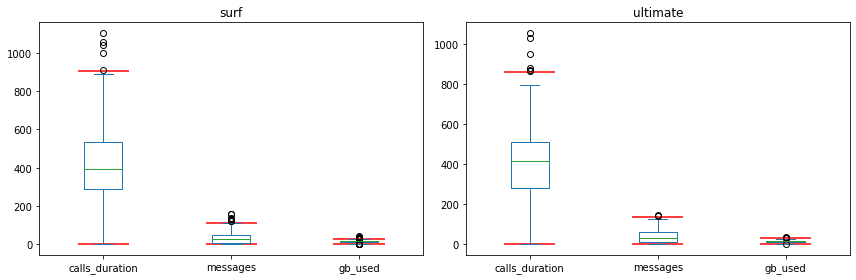

In [59]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

for plan_id in plans_df.index:
    plan_df = avg_monthly_usage.loc[plan_id]
    plan_df.plot(kind='box', ax=axes[plan_id]);
    axes[plan_id].set_title(plans_df.loc[plan_id]['plan_name'])
    
    # print(monthly_usage.columns)
    for index, column in enumerate(avg_monthly_usage.columns):
        series = plan_df[column]
        lower_extreme, upper_extreme, _, _, _ = calculate_descriptive_stats(series)
        axes[plan_id].hlines([lower_extreme, upper_extreme], color='red', xmin=index + 0.8, xmax=index + 1.2)
    

    fig.tight_layout()

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please clearly analyse graphs? Please note that this applies to all other graphs too.
</div>

<div class="alert alert-info"> <b>Student comment:</b> <br />
I am not sure how should I verbalise the graphs for this exercise, so I'll attempt a very verbose description of what I see.  
</div>

In [60]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

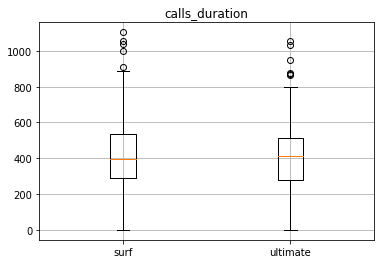

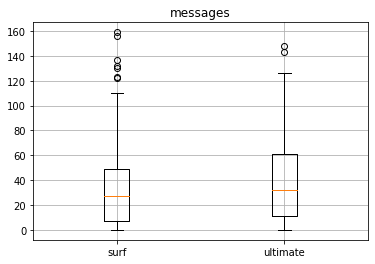

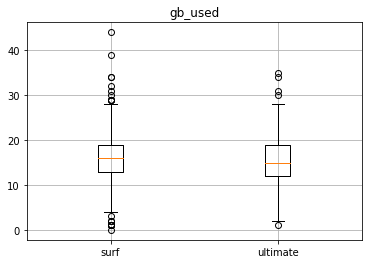

In [61]:
for index, column in enumerate(avg_monthly_usage.columns):
    series = avg_monthly_usage[column]
    plt.boxplot([avg_monthly_usage[column][0], avg_monthly_usage[column][1]], labels=plans_df['plan_name'])
    plt.title(column)
    plt.grid(True)
    plt.show();

Description of plots:
- call duration:  
range of values is 0-900 for surf, 0-800 for ultimate  
median is a bit higher for ultimate (400+), as oppoosed to surf (400-)  
IQR is about the same  
there are visible upper outliers for both plans  
both look approximately normally distributed  
- messages:
range of values is 0-110 for surf, 0-130 for ultimate  
median is higher for ultimate (30+), as opposed to surf (30-)  
IQR is bigger for ultimate  
there are upper extreme outliers for both plans  
both appear to be right-skewed, ultimate is more dispersed  
- internet (gb used):
range of values is similar between plans, surf is approximately 5-28, and ultimate is approximately 2-28  
median is higher for surf  
IQR is bigger for ultimate  
there are upper and lower outliers for both plans  
both look approximately normally distributed  

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you plotted boxplots and described an outliers in details.
</div>

Detected outliers, checking ratio:

In [62]:
def detect_outliers(df):
    """"""
    
    for column in df.columns:
        series = df[column]
        lower_extreme, upper_extreme, _, _, _ = calculate_descriptive_stats(series)
        outliers = series[(series < lower_extreme) | (series > upper_extreme)]
        len(outliers) / len(series)
        print(f'{series.name} outliers: {len(outliers)} ({len(outliers)/len(series):.2%})')
        print(f'lower extreme: {lower_extreme}  upper extreme: {upper_extreme}')
        print(outliers, '\n')

In [63]:
detect_outliers(avg_monthly_usage)

calls_duration outliers: 8 (1.63%)
lower extreme: 0  upper extreme: 893.125
plan_id  user_id
0        1003       1104
         1118        909
         1240        999
         1324       1055
         1365       1040
1        1329       1030
         1382       1054
         1412        947
Name: calls_duration, dtype: int64 

messages outliers: 11 (2.24%)
lower extreme: 0  upper extreme: 118.375
plan_id  user_id
0        1052       159
         1076       123
         1119       122
         1324       130
         1328       137
         1381       156
         1470       132
1        1132       143
         1229       125
         1230       126
         1303       148
Name: messages, dtype: int64 

gb_used outliers: 22 (4.49%)
lower extreme: 2.125  upper extreme: 29.125
plan_id  user_id
0        1034        1
         1119        1
         1121       34
         1147       32
         1240       34
         1268       31
         1292       39
         1306        1
         1323

Outliers are within a reasonable threshold,  
removing for further statistically convenient analysis.

In [64]:
def remove_outliers(df):
    queries = []
    
    for column in df.columns:
        series = df[column]
        lower_extreme, upper_extreme, _, _, _ = calculate_descriptive_stats(series)
        queries.append(f'({lower_extreme} <= {column} <= {upper_extreme})')
        
    query = ' and '.join(queries)
    # print(query)
    
    result = df.query(query)
    outliers_count = len(df) - len(result)
    
    if outliers_count <= 0:
        print('No outliers detected.')
        return df
    
    print(f'Removed {outliers_count} ({outliers_count/len(df):.2%}) outliers [{len(df)} -> {len(result)}].')
    return result

In [65]:
avg_monthly_usage_filtered = remove_outliers(avg_monthly_usage)

Removed 37 (7.55%) outliers [490 -> 453].


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you clearly analysed an outliers and removed them. It's a good idea to check the percentage of an outliers in data.
</div>

<a class="anchor" id="4_2-stats"></a>
### Descriptive Statistics
[back to Analysis](#4_analysis)

In [66]:
avg_monthly_usage_filtered.describe()

,calls_duration,messages,gb_used
count,453.000000,453.000000,453.000000
mean,403.975717,31.988962,15.558499
std,178.022786,27.888088,4.837560
min,0.000000,0.000000,3.000000
25%,289.000000,9.000000,13.000000
50%,402.000000,27.000000,16.000000
75%,528.000000,51.000000,19.000000
max,889.000000,118.000000,29.000000


In [67]:
np.var(avg_monthly_usage_filtered)

calls_duration    31622.151728
messages            776.028576
gb_used              23.350331
dtype: float64

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Well done that you calculated the mean, variance and standard deviation for both plans, but please analyse it and make a corresponding conclusions.
</div>

The statistics reaffirm what the boxplots have shown, only in a more precise way.  
The mean of calls is >> mean of messages > mean of gb used,  
and also the variance is much bigger for calls than it is for messages,  
and bigger for messages than it is for gb used.  

The same is also true for the dispersion (variance),  standard deviation (since it is the squared root of variance),  min/max, quartiles and IQR.  
The range of values for calls is much bigger than that of messages, which is bigger than that of gb used.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
It will be better to explain how these statistics have influence on the data. What does it mean if the variance is much bigger for calls than it is for messages?
</div>

<a class="anchor" id="4_3-plots"></a>
### Plots
[back to Analysis](#4_analysis)

In [68]:
# this function should be refactored to a class,
# unmaintainable, bad practice. big no-no for production.

def iter_plot(df, apply, shape=None, **kwargs):
    """"""
    
    plt_params = ['title']
    plt_deferred = {}
    
    ax_count = 0
    ax_params = ['axtitle', 'xlabel', 'ylabel']
    ax_deferred = {}

    def parse_kwargs():
        nonlocal ax_deferred
        
        for k in ax_params:
            if k in kwargs:
                ax_deferred[k] = kwargs.pop(k)
                
    def apply_ax(ax, series):
        nonlocal ax_deferred
        
        if 'axtitle' in ax_deferred:
            title = ax_deferred['axtitle']
            
            if isinstance(title, dict):
                ax.set_title(title.get(series.name) or '')
            elif callable(title):
                ax.set_title(title(series))
            
        if 'xlabel' in ax_deferred:
            ax.set_xlabel(ax_deferred['xlabel'])
            
        if 'ylabel' in ax_deferred:
            ax.set_ylabel(ax_deferred['ylabel'])
        
        for k, v in ax_deferred.items():
            kwargs[k] = ax_deferred[k]
            
        ax_deferred.clear()
        
    def plot_series(series):
        # print(series.name, series)
        
        nonlocal ax_count
        ax = axes[ax_count]
            
        parse_kwargs()
        apply(series, ax, **kwargs)
        apply_ax(ax, series)
        
        ax_count += 1
        ax_count %= shape[1]
        
    def plot_dataframe(df):
        # print(df.name, df.columns)
        
        for _, series in df.items():
            series.group = df.name if hasattr(df, 'name') else None
            plot_series(series)
            
    for k in plt_params:
        if k in kwargs:
            plt_deferred[k] = kwargs.pop(k)
            
    if isinstance(df, pd.core.groupby.DataFrameGroupBy):
        if not shape:
            # shape = len(df), len(df.obj.columns) # multiple rows
            shape = (1, len(df.obj.columns))
            
        fig, axes = plt.subplots(*shape)
            
        for group_name, group in df:
            group.name = group_name
            plot_dataframe(group)
    else:
        if not shape:
            shape = (1, len(df.columns))
            
        fig, axes = plt.subplots(*shape)
        plot_dataframe(df)
        
    fig.tight_layout(pad=3)
    
    if 'title' in plt_deferred:
        fig.suptitle(plt_deferred['title'])

In [69]:
def plot_frequency_hist(df, **kwargs):
    """"""
    
    iter_plot(
        df,
        lambda series, ax, **args: (series
                                       .rename(plans_df.loc[series.group, 'plan_name'])
                                       .hist(density=True, ax=ax, **args, legend='True')),
        **kwargs
    )

In [70]:
def plot_box(df, tick_labels=None, figsize=None):
    fig, axes = plt.subplots(1, len(df.columns), figsize=figsize)
    flat_axes = axes.flatten()
    
    for col_i, column in enumerate(df.columns):
        ax = flat_axes[col_i]
        ax.boxplot([
            df[column][0],
            df[column][1]
        ], vert=False)
        ax.set_title(column)
        ax.set_yticklabels(tick_labels)
        
    fig.tight_layout()
    plt.show();

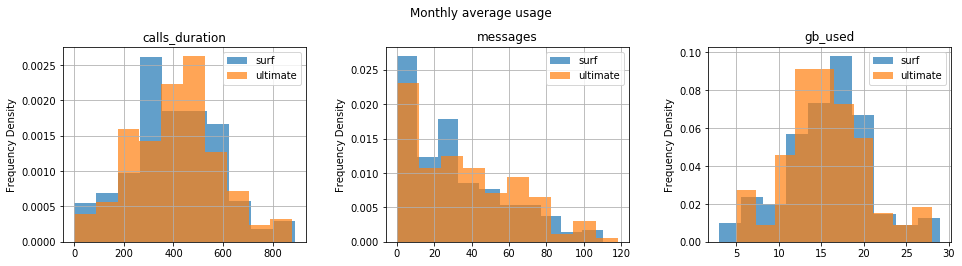

In [71]:
plot_frequency_hist(
    avg_monthly_usage_filtered.groupby('plan_id'),
    alpha=.7,
    figsize=(14,4),
    title='Monthly average usage',
    axtitle=lambda series: series.name,
    ylabel='Frequency Density'
)

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please analyse graphs clearly.
</div>

Visual description of the plots:  
\* the numbers are rough approximations
- calls_duration:  
  Ultimate plan has more customers with a larger avg. calls' duration,  
  Ultimate has most customers at 500, Surf at 300.
- messages:  
  Surf has most customers at 10, Ultimate at ~10 also but less frequent than Surf,  
  Ultimate has more customers at around 60-70 and 90-110 than Surf.
- gb_used:  
  Surf has more customers with a larger avg. traffic volume,  
  Surf has most customers at 16-18, Ultimate at 13-17.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
An excellent analysis of the graphs 👍👍👍
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Please note that you can avoid warnings (if necessary) by using the code below.
</div>

In [72]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

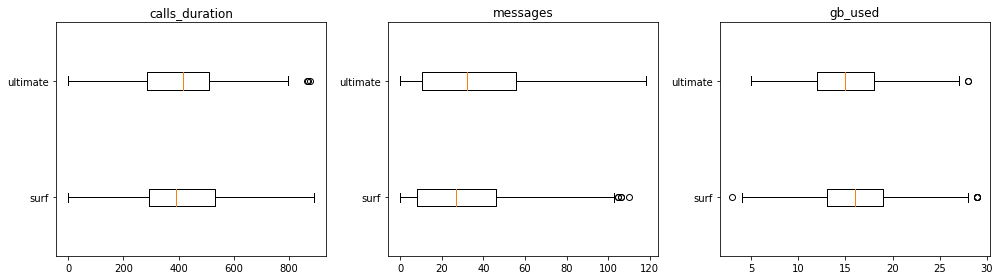

In [73]:
plot_box(avg_monthly_usage_filtered, tick_labels=plans_df['plan_name'], figsize=(14,4))

'calls_duration' and 'gb_used' are normally distributed, while 'messages' is right-skewed.  
There are some differences between the plans, but overall distribution is similar.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Well done that you plot boxplot, but please describe outliers in more details.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right :)
</div>

In [74]:
avg_monthly_usage_filtered.groupby('plan_id').mean().T

plan_id,0,1
calls_duration,402.793548,406.538462
messages,30.419355,35.391608
gb_used,15.593548,15.482517


In [75]:
detect_outliers(avg_monthly_usage_filtered)

calls_duration outliers: 1 (0.22%)
lower extreme: 0  upper extreme: 886.5
plan_id  user_id
0        1326       889
Name: calls_duration, dtype: int64 

messages outliers: 1 (0.22%)
lower extreme: 0  upper extreme: 114.0
plan_id  user_id
1        1435       118
Name: messages, dtype: int64 

gb_used outliers: 5 (1.10%)
lower extreme: 4.0  upper extreme: 28.0
plan_id  user_id
0        1194       29
         1201       29
         1215       29
         1259        3
         1293       29
Name: gb_used, dtype: int64 



Since outliers were already removed, the underlying series has changed,  
and now the outlier detection mechanism detects new outliers.  
This mechanism is not perfect, and the new outliers will not be removed,  
as they are relatively close to the extremes.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, we shouldn't remove these new outliers.
</div>

### Revenue plot

In [76]:
avg_monthly_rev = (
    add_plan_id(revenue_df.reset_index())
     .groupby(['plan_id', 'user_id'])
     ['total']
     .mean()
     .astype('int')
     .groupby('plan_id'))
avg_monthly_rev.obj

plan_id  user_id
0        1001        50
         1002        33
         1003       158
         1004        76
         1005        40
                   ... 
1        1482        70
         1487        70
         1490       114
         1493        70
         1497        70
Name: total, Length: 490, dtype: int64

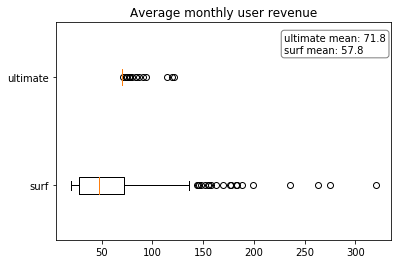

In [77]:
plt.boxplot([avg_monthly_rev.obj[0], avg_monthly_rev.obj[1]], vert=False)
plt.yticks([1,2], plans_df['plan_name'])
plt.title('Average monthly user revenue')
plt.text(230, 2.4,
         f"{plans_df['plan_name'][1]} mean: {avg_monthly_rev.mean()[1]:.1f}\n"\
         f"{plans_df['plan_name'][0]} mean: {avg_monthly_rev.mean()[0]:.1f}",
         verticalalignment='top',
         bbox={'boxstyle': 'round', 'facecolor': 'white', 'alpha': 0.5})
plt.show();

The dispersion of Ultimate is much smaller than that of Surf,  
There are many more Surf users of varying avg. monthly revenue,  
while Ultimate users are more condensed around the median (~70).  
There are many upper extreme outliers (users with unusually high revenue) on both plans.

Ultimate's mean and median are greater than Surf's,  
which means that 'Ultimate' plan users are bringing in more revenue on average.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please add a conclusion for each part of the project?
</div>

<a class="anchor" id="4_analysis-conclusions"></a>
### Conclusions
[back to Analysis](#4_analysis)

Outliers have been detected for calls, messages and internet usage, and removed.  
The distributions have been identified for each column, compared between 'Surf' and 'Ultimate' users,  
the overall the average usage patterns look similar,  
but the Ultimate plan generates more revenue on average.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you clearly described main results of this part of the project.
</div>

<a class="anchor" id="5_hypotheses"></a>
## Testing Hypotheses
***
[back to Table of Contents](#0_toc)
<br />[Conclusions](#5_hypotheses-conclusions)


There are 2 hypotheses to test:
1. [The average revenue from users of Ultimate and Surf calling plans differs.](#5_1-plans_hypothesis)
2. [The average revenue from users in NY-NJ area is different from that of the users from other regions.](#5_2-ny_nj_hypothesis)

When testing for difference between populations, null hypothesis should be their equality, and the alternative should be that they differ.  

Setting the threshold for statistical significance to be .05,  
and testing using Student's t-test:  

a significance level of .05 signifies a 5% risk of deciding that an effect exists when it does not exist.  
\- https://statisticsbyjim.com/hypothesis-testing/hypothesis-tests-significance-levels-alpha-p-values/

In [78]:
def test_hypothesis(df, equal_var=True, alpha=.05):
    """"""
    
    groups = [v for k,v in list(df)]
    
    results = st.ttest_ind(groups[0], groups[1], equal_var=equal_var)
    print(f'p-value: {results.pvalue}\nis p-value < alpha ?\n\t{results.pvalue < alpha}')

    if results.pvalue < alpha:
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis")

<a class="anchor" id="5_1-plans_hypothesis"></a>
### 'Surf' / 'Ultimate' Plans hypothesis
[back to Hypotheses](#5_hypotheses)

null hypothesis: The average revenue from users of Ultimate and Surf calling plans is equal.  
alternative hypothesis: The average revenue from users of Ultimate and Surf calling plans differs.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job that you formulated the null and alternative hypotheses explicitly.
</div>

In [79]:
avg_monthly_rev.apply(lambda x:np.var(x))

plan_id
0    1888.636384
1      53.863930
Name: total, dtype: float64

the variance differes greatly,  
threshold for statistical significance will be set at .05

In [80]:
test_hypothesis(avg_monthly_rev, equal_var=False, alpha=.05)

p-value: 2.7489012368011817e-08
is p-value < alpha ?
	True
We reject the null hypothesis


Resulting p-value is less than the .05 threshold  
\- which means result is statistically significant,  
and therefore reject the null hypothesis and accept the alternative hypothesis.

the _accepted hypothesis_ is:  
alernative hypothesis - "The average revenue from users of Ultimate and Surf calling plans differs".

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you right. We have a statistically significant differences in the average revenue from users of Ultimate and Surf plans.
</div>

<a class="anchor" id="5_2-ny_nj_hypothesis"></a>
### NY-NJ hypothesis
[back to Hypotheses](#5_hypotheses)

null hypothesis: The average revenue from users in NY-NJ area is equal to that of the users from other regions.  
alternative hypothesis: The average revenue from users in NY-NJ area is different from that of the users from other regions.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Hypotheses formulation is correct :)
</div>

In [81]:
cities_avg_monthly_revenue = (revenue_df.groupby('user_id').mean()
                  .merge(users_df[['user_id', 'city']], on='user_id'))
cities_avg_monthly_revenue.head(2)

,user_id,calls,messages,internet,plan_price,total,city
0,1000,0.0,0.000,0.0,70.0,70.000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,0.0,0.018,30.0,20.0,50.018,"Seattle-Tacoma-Bellevue, WA MSA"


In [82]:
avg_monthly_rev_by_msa = (cities_avg_monthly_revenue
                          .groupby([
                              pd.Series(
                                  np.where(
                                      cities_avg_monthly_revenue['city'].str.endswith('NY-NJ-PA MSA'),
                                      'NY-NJ',
                                      'Other'),
                                  name='msa'),
                              'user_id'])
                          ['total']
                          .mean()
                          .groupby('msa'))
avg_monthly_rev_by_msa.obj

msa    user_id
NY-NJ  1014       29.420000
       1022       56.125000
       1024       21.920000
       1027       33.333333
       1031       70.000000
                    ...    
Other  1492       25.000000
       1493       70.000000
       1496       28.000000
       1497       70.000000
       1499       55.000000
Name: total, Length: 490, dtype: float64

In [83]:
avg_monthly_rev_by_msa.apply(lambda x:np.var(x))

msa
NY-NJ    1058.478488
Other    1397.160725
Name: total, dtype: float64

The variance appears to be similar,  
threshold for statistical significance will be set at .05

In [84]:
test_hypothesis(avg_monthly_rev_by_msa, equal_var=True, alpha=.05)

p-value: 0.48043818838129104
is p-value < alpha ?
	False
We can't reject the null hypothesis


Resulting p-value is above the .05 threshold,   
\- meaning the result is not statistically significant  
fail to reject the null hypothesis.

The _accepted hypothesis_ is:  
null hypothesis - "The average revenue from users in NY-NJ area is equal to that of the users from other regions".

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
You are right, there is no a statistically significant differences in the average revenue from users in NY-NJ area and users from other regions. I suppose that the differences can be due to different data preparation.
</div>

<a class="anchor" id="5_hypotheses-conclusions"></a>
### Conclusions
[back to Testing Hypotheses](#5_hypotheses)

Found out that the average revenue differs between the different plans,  
and that there are no exceptional differences between the average revenue of various areas of residence (tested for NY-NY area vs. the general population).

<a class="anchor" id="6_conclusions"></a>
## Overall Conclusions
***
[back to Table of Contents](#0_toc)

By doing statistical hypothesis testing, the following conclusions are made:
1. Revenue generated from 'Surf' plan customers is different to 'Ultimate' plan customers
2. The user's area of residence has little to no effect on revenue

By analysing the data, it is evident that there are more 'Surf' customers and the total revenue is higher compared to 'Ultimate' total revenue,  
'Surf' plan customers are using 2 times more data than 'Ultimate' plan customers,  
and are almost always exceeding their monthly plan limits (via calls, messages and internet traffic).  

Despite all that, the revenue plot shows that 'Ultimate' plan customers bring in more revenue on average.

In the short-term, since the are more 'Surf' customers, increasing their usage patterns might bring in more revenue,  
but in the long-term, attracting more 'Ultimate' customers or converting existing 'Surf' customers to the 'Ultimate' plan will be more profitable.

To conclude, 'Ultimate' plan seems to be the more profitable avenue worth pursuing.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Definitely, for the operator, the Smart tariff will be more profitable, while maintaining the current limits on the subscription fee.
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
It will be better to describe all main results of the project (data preparation, anomalies, main findings and so on).
    
The conclusion is intended to help the reader understand why your research should matter to them after they have finished reading the paper. A conclusion is not merely a summary of your points or a re-statement of your research problem but a synthesis of key points. 
</div>

<div class="alert alert-info"><b>Student comment:</b> <br />
Could you please give me a few examples of what such a synthesis might look like? <br />
Doesn't have to be too elaborated, just a few key points specific to these findings. <br /><br /> Thank you :)
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Please see the following links: https://www.indeed.com/career-advice/career-development/how-to-write-a-conclusion, https://www.time4writing.com/writing-resources/writing-a-good-conclusion-paragraph/, https://www.javatpoint.com/how-to-write-a-conclusion-for-a-project
</div>